# Chapter 2

## Filtering and Targeting Data

In [ ]:
# conda install psycopg2

In [32]:
# Import create_engine function
from sqlalchemy import create_engine, select, Table, MetaData

# Create an engine to the census database
engine = create_engine('postgresql+psycopg2://' +
                       'student:datacamp' +
                       '@postgresql.csrrinzqubik.us-east-1.rds.amazonaws.com' +
                       ':5432/census')

# Use the .table_names() method on the engine to print the table names
print(engine.table_names())

['census', 'state_fact', 'data', 'users']


In [ ]:
# harrumph -code is correct, but grant permissions prevent it from working...
# switch to local sqlite DB of census
engine = create_engine('sqlite:///census.sqlite')
connection = engine.connect()

In [51]:
# Create a select query: stmt
stmt = select([census])

# Add a where clause to filter the results to only those for New York
stmt = stmt.where(census.columns.state == 'New York')

# Execute the query to retrieve all the data returned: results
results = connection.execute(stmt).fetchall()

# Loop over the results and print the age, sex, and pop2008
for result in results:
    print(result.age, result.sex, result.pop2008)

0 M 128088
1 M 125649
2 M 121615
3 M 120580
4 M 122482
5 M 121205
6 M 120089
7 M 122355
8 M 118653
9 M 117369
10 M 118810
11 M 121121
12 M 126338
13 M 128713
14 M 129812
15 M 134463
16 M 136569
17 M 140114
18 M 156892
19 M 147556
20 M 146611
21 M 141932
22 M 138557
23 M 136150
24 M 132383
25 M 141850
26 M 129603
27 M 131419
28 M 127224
29 M 122449
30 M 126404
31 M 126124
32 M 123362
33 M 126486
34 M 120030
35 M 123017
36 M 127076
37 M 136270
38 M 144715
39 M 135027
40 M 135355
41 M 132905
42 M 140025
43 M 151555
44 M 149030
45 M 148147
46 M 146692
47 M 147648
48 M 155155
49 M 144287
50 M 143466
51 M 139630
52 M 133939
53 M 136723
54 M 125953
55 M 122478
56 M 118070
57 M 115823
58 M 117177
59 M 108293
60 M 106825
61 M 113681
62 M 83763
63 M 81226
64 M 76961
65 M 82242
66 M 70423
67 M 64117
68 M 63657
69 M 58801
70 M 57609
71 M 53231
72 M 51132
73 M 50696
74 M 44822
75 M 43592
76 M 41900
77 M 40417
78 M 40241
79 M 35941
80 M 34659
81 M 32022
82 M 28890
83 M 27217
84 M 23879
85 M 124478
0

In [52]:
# data prep
states = ['New York', 'California', 'Texas']

In [53]:
# Create a query for the census table: stmt
stmt = select([census])

# Append a where clause to match all the states in_ the list states
stmt = stmt.where(census.columns.state.in_(states))

# Loop over the ResultProxy and print the state and its population in 2000
for result in connection.execute(stmt):
    print(result.state, result.pop2000)

New York 126237
New York 124008
New York 124725
New York 126697
New York 131357
New York 133095
New York 134203
New York 137986
New York 139455
New York 142454
New York 145621
New York 138746
New York 135565
New York 132288
New York 132388
New York 131959
New York 130189
New York 132566
New York 132672
New York 133654
New York 132121
New York 126166
New York 123215
New York 121282
New York 118953
New York 123151
New York 118727
New York 122359
New York 128651
New York 140687
New York 149558
New York 139477
New York 138911
New York 139031
New York 145440
New York 156168
New York 153840
New York 152078
New York 150765
New York 152606
New York 159345
New York 148628
New York 147892
New York 144195
New York 139354
New York 141953
New York 131875
New York 128767
New York 125406
New York 124155
New York 125955
New York 118542
New York 118532
New York 124418
New York 95025
New York 92652
New York 90096
New York 95340
New York 83273
New York 77213
New York 77054
New York 72212
New York 70967
N

In [47]:
# Import and_
from sqlalchemy import and_

# Build a query for the census table: stmt
stmt = select([census])

# Append a where clause to select only non-male records from California using and_
stmt = stmt.where(
    # The state of California with a non-male sex
    and_(census.columns.state == 'California',
         census.columns.sex != 'M'
         )
)

# Loop over the ResultProxy printing the age and sex
for result in connection.execute(stmt):
    print(result.age, result.sex)

0 F
1 F
2 F
3 F
4 F
5 F
6 F
7 F
8 F
9 F
10 F
11 F
12 F
13 F
14 F
15 F
16 F
17 F
18 F
19 F
20 F
21 F
22 F
23 F
24 F
25 F
26 F
27 F
28 F
29 F
30 F
31 F
32 F
33 F
34 F
35 F
36 F
37 F
38 F
39 F
40 F
41 F
42 F
43 F
44 F
45 F
46 F
47 F
48 F
49 F
50 F
51 F
52 F
53 F
54 F
55 F
56 F
57 F
58 F
59 F
60 F
61 F
62 F
63 F
64 F
65 F
66 F
67 F
68 F
69 F
70 F
71 F
72 F
73 F
74 F
75 F
76 F
77 F
78 F
79 F
80 F
81 F
82 F
83 F
84 F
85 F


## Ordering

In [56]:
# Build a query to select the state column: stmt
stmt = select([census.columns.state])

# Order stmt by the state column
stmt = stmt.order_by(census.columns.state)

# Execute the query and store the results: results
results = connection.execute(stmt).fetchall()

# Print the first 10 results
print(results[:10])

[('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',), ('Alabama',)]


In [62]:
# Import desc
from sqlalchemy import desc

# Build a query to select the state column: stmt
stmt = select([census.columns.state])

# Order stmt by state in descending order: rev_stmt
rev_stmt = stmt.order_by(desc(census.columns.state))

# Execute the query and store the results: rev_results
rev_results = connection.execute(rev_stmt).fetchall()

# Print the first 10 rev_results
print(rev_results[:10])

[('Wyoming',), ('Wyoming',), ('Wyoming',), ('Wyoming',), ('Wyoming',), ('Wyoming',), ('Wyoming',), ('Wyoming',), ('Wyoming',), ('Wyoming',)]


In [63]:
# Build a query to select state and age: stmt
stmt = select([census.columns.state, census.columns.age])

# Append order by to ascend by state and descend by age
stmt = stmt.order_by(census.columns.state, desc(census.columns.age))

# Execute the statement and store all the records: results
results = connection.execute(stmt).fetchall()

# Print the first 20 results
print(results[:20])

[('Alabama', 85), ('Alabama', 85), ('Alabama', 84), ('Alabama', 84), ('Alabama', 83), ('Alabama', 83), ('Alabama', 82), ('Alabama', 82), ('Alabama', 81), ('Alabama', 81), ('Alabama', 80), ('Alabama', 80), ('Alabama', 79), ('Alabama', 79), ('Alabama', 78), ('Alabama', 78), ('Alabama', 77), ('Alabama', 77), ('Alabama', 76), ('Alabama', 76)]


In [65]:
from sqlalchemy import func

# Build a query to count the distinct states values: stmt
stmt = select([func.count(census.columns.state.distinct())])

# Execute the query and store the scalar result: distinct_state_count
distinct_state_count = connection.execute(stmt).scalar()

# Print the distinct_state_count
print(distinct_state_count)


51


In [72]:
# Import func
from sqlalchemy import func

# Build a query to select the state and count of ages by state: stmt
stmt = select([census.columns.state, func.count(census.columns.age)])

# Group stmt by state
stmt = stmt.group_by(census.columns.state)

# Execute the statement and store all the records: results
results = connection.execute(stmt).fetchall()

# Print results
print(results)

# Print the keys/column names of the results returned
print(results[0].keys())

[('Alabama', 172), ('Alaska', 172), ('Arizona', 172), ('Arkansas', 172), ('California', 172), ('Colorado', 172), ('Connecticut', 172), ('Delaware', 172), ('District of Columbia', 172), ('Florida', 172), ('Georgia', 172), ('Hawaii', 172), ('Idaho', 172), ('Illinois', 172), ('Indiana', 172), ('Iowa', 172), ('Kansas', 172), ('Kentucky', 172), ('Louisiana', 172), ('Maine', 172), ('Maryland', 172), ('Massachusetts', 172), ('Michigan', 172), ('Minnesota', 172), ('Mississippi', 172), ('Missouri', 172), ('Montana', 172), ('Nebraska', 172), ('Nevada', 172), ('New Hampshire', 172), ('New Jersey', 172), ('New Mexico', 172), ('New York', 172), ('North Carolina', 172), ('North Dakota', 172), ('Ohio', 172), ('Oklahoma', 172), ('Oregon', 172), ('Pennsylvania', 172), ('Rhode Island', 172), ('South Carolina', 172), ('South Dakota', 172), ('Tennessee', 172), ('Texas', 172), ('Utah', 172), ('Vermont', 172), ('Virginia', 172), ('Washington', 172), ('West Virginia', 172), ('Wisconsin', 172), ('Wyoming', 17

In [73]:
# Import func
from sqlalchemy import func

# Build an expression to calculate the sum of pop2008 labeled as population
pop2008_sum = func.sum(census.columns.pop2008).label('population')

# Build a query to select the state and sum of pop2008: stmt
stmt = select([census.columns.state, pop2008_sum])

# Group stmt by state
stmt = stmt.group_by(census.columns.state)

# Execute the statement and store all the records: results
results = connection.execute(stmt).fetchall()

# Print results
print(results)

# Print the keys/column names of the results returned
print(results[0].keys())

[('Alabama', 4649367), ('Alaska', 664546), ('Arizona', 6480767), ('Arkansas', 2848432), ('California', 36609002), ('Colorado', 4912947), ('Connecticut', 3493783), ('Delaware', 869221), ('District of Columbia', 588910), ('Florida', 18257662), ('Georgia', 9622508), ('Hawaii', 1250676), ('Idaho', 1518914), ('Illinois', 12867077), ('Indiana', 6373299), ('Iowa', 3000490), ('Kansas', 2782245), ('Kentucky', 4254964), ('Louisiana', 4395797), ('Maine', 1312972), ('Maryland', 5604174), ('Massachusetts', 6492024), ('Michigan', 9998854), ('Minnesota', 5215815), ('Mississippi', 2922355), ('Missouri', 5891974), ('Montana', 963802), ('Nebraska', 1776757), ('Nevada', 2579387), ('New Hampshire', 1314533), ('New Jersey', 8670204), ('New Mexico', 1974993), ('New York', 19465159), ('North Carolina', 9121606), ('North Dakota', 634282), ('Ohio', 11476782), ('Oklahoma', 3620620), ('Oregon', 3786824), ('Pennsylvania', 12440129), ('Rhode Island', 1046535), ('South Carolina', 4438870), ('South Dakota', 800997),

In [74]:
# import pandas
import pandas as pd

# Create a DataFrame from the results: df
df = pd.DataFrame(results)

# Set column names
df.columns = results[0].keys()

# Print the Dataframe
print(df)

                   state  population
0                Alabama     4649367
1                 Alaska      664546
2                Arizona     6480767
3               Arkansas     2848432
4             California    36609002
5               Colorado     4912947
6            Connecticut     3493783
7               Delaware      869221
8   District of Columbia      588910
9                Florida    18257662
10               Georgia     9622508
11                Hawaii     1250676
12                 Idaho     1518914
13              Illinois    12867077
14               Indiana     6373299
15                  Iowa     3000490
16                Kansas     2782245
17              Kentucky     4254964
18             Louisiana     4395797
19                 Maine     1312972
20              Maryland     5604174
21         Massachusetts     6492024
22              Michigan     9998854
23             Minnesota     5215815
24           Mississippi     2922355
25              Missouri     5891974
2

                   state  population
0                Alabama     4649367
1                 Alaska      664546
2                Arizona     6480767
3               Arkansas     2848432
4             California    36609002
5               Colorado     4912947
6            Connecticut     3493783
7               Delaware      869221
8   District of Columbia      588910
9                Florida    18257662
10               Georgia     9622508
11                Hawaii     1250676
12                 Idaho     1518914
13              Illinois    12867077
14               Indiana     6373299
15                  Iowa     3000490
16                Kansas     2782245
17              Kentucky     4254964
18             Louisiana     4395797
19                 Maine     1312972
20              Maryland     5604174
21         Massachusetts     6492024
22              Michigan     9998854
23             Minnesota     5215815
24           Mississippi     2922355
25              Missouri     5891974
2

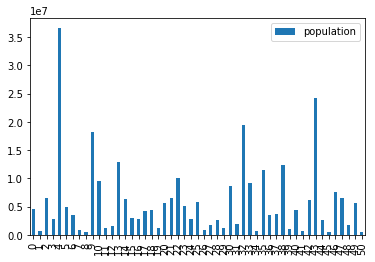

In [76]:
# Import Pyplot as plt from matplotlib
import matplotlib.pyplot as plt

# Create a DataFrame from the results: df
df = pd.DataFrame(results)

# Set Column names
df.columns = results[0].keys()

# Print the DataFrame
print(df)

# Plot the DataFrame
df.plot.bar()
plt.show()